### Marketing - Restaurant Recommendation and Star Rating Analysis
- This project aims to analyze restaurant data from a B2C portal to identify top-performing ("star") restaurants and generate meaningful recommendations using exploratory data analysis (EDA) and intelligent automation. The analysis is based on two datasets: one containing restaurant-level details and another mapping country codes.

#### Objectives:
-Perform preliminary data inspection and cleaning

- Analyze geographic distribution and franchise presence

- Explore key features such as table booking, online delivery, cost, and cuisine types

- Understand how different variables affect restaurant ratings

- Visualize insights through Tableau for better decision-making and dashboard creation

#### Importing Data

In [8]:
import pandas as pd

#load the dataset
data = pd.read_excel("data.xlsx")
country_code = pd.read_excel("Country-Code.xlsx")


#### Data Inspection

##### Checking basic structure

In [10]:
#checking the shape (row x column) 

print("Data Shape: ", data.shape)
print("Country code shape: ", country_code.shape)

Data Shape:  (9551, 19)
Country code shape:  (15, 2)


#### 1. For "Data" table

In [12]:

#check column names, data types and null values

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [14]:

#checking for null values
print("\n Null values: ", data.isnull().sum())



 Null values:  Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


- Restaurant Name has <b>1 null value.</b>
- Cuisines has <b>9 null values.</b>

Since, <i> Restaurant Name</i> is one of the key identifiers and imptuing or guessing the name can't fix the null value so, we will drop this row. 

Likewise, we'll drop the rows with 9 null values for <i>Cuisines</i> column. We could have filled it with 'Unknown' as well. But, dropping these 9 rows
is not huge for our dataset with 9551 rows (which is less than <b>0.1%</b> of our data thus, it wouldn't affect our analysis and gives us a clean data. 

In [16]:

#dropping rows where 'Restaurant Name' and 'Cuisines' is null
data = data.dropna(subset=['Restaurant Name','Cuisines'])

#confirming that null values are removed from both columns
print("Null values after dropping: \n")
print(data[['Restaurant Name', 'Cuisines']].isnull().sum())



Null values after dropping: 

Restaurant Name    0
Cuisines           0
dtype: int64


In [18]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### Exploring Categorical columns 

##### (A) Get all the categorical columns from "Data" table

In [20]:
#get all categorical cols (object-type) columns together
categorical_columns = data.select_dtypes(include='object').columns
print("All the Categorical columns from data are:")
for col in categorical_columns:  #print each column in a new line
    print(col) 

All the Categorical columns from data are:
Restaurant Name
City
Address
Locality
Locality Verbose
Cuisines
Currency
Has Table booking
Has Online delivery
Rating color
Rating text


##### (B) Exploring Unique Values and checking Data Quality
- Out of 11 categorical columns, we'll leave few such as <i>Restaurant Name, Address, Locality Verbose, Currency and Rating Color</i> as
  these do not play critical role in our objectives and we'll get too many unique values of these columns if done and it can be hard to visualize them.
- We'll explore the remaining important categorical columns such as: <br>
      <b>
      - City
      - Locality
      - Cuisines
      - Has Table Booking
      - Has Online Delivery
      - Rating Text           
  </b></br>
We are exploring unique values because:
- <b>To understand the shape & complexity of the data.</b>
      - Finding the no. of unique values help us answer if the column is simple or complex
      - Are there many categories or just a few?
      - Should we group, filter or drop this column later?
- <b>To detect dirty or inconsistent data</b>
    - When looking at the unique values, we oftern find typos error (eg. delhi Delhi), formatting issues, redundant categories, etc.
- <b>To spot high cardinality columns</b>
    - Some columns might have too many unique values which are not ideal for viz or aggregations and are mostly skipped for EDA.

#### City Column Exploration

##### Unique values in City

In [22]:
# Unique values in 'City'
print("Unique values in City:", data['City'].nunique())
print("\nList of unique cities:")
print(sorted(data['City'].unique()))


Unique values in City: 140

List of unique cities:
['Abu Dhabi', 'Agra', 'Ahmedabad', 'Albany', 'Allahabad', 'Amritsar', 'Ankara', 'Armidale', 'Athens', 'Auckland', 'Augusta', 'Aurangabad', 'Balingup', 'Bandung', 'Bangalore', 'Beechworth', 'Bhopal', 'Bhubaneshwar', 'Birmingham', 'Bogor', 'Boise', 'BrasÌ_lia', 'Cape Town', 'Cedar Rapids/Iowa City', 'Chandigarh', 'Chatham-Kent', 'Chennai', 'Clatskanie', 'Cochrane', 'Coimbatore', 'Colombo', 'Columbus', 'Consort', 'Dalton', 'Davenport', 'Dehradun', 'Des Moines', 'Dicky Beach', 'Doha', 'Dubai', 'Dubuque', 'East Ballina', 'Edinburgh', 'Faridabad', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville', 'Ghaziabad', 'Goa', 'Gurgaon', 'Guwahati', 'Hepburn Springs', 'Huskisson', 'Hyderabad', 'Indore', 'Inner City', 'Inverloch', 'Jaipur', 'Jakarta', 'Johannesburg', 'Kanpur', 'Kochi', 'Kolkata', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'London', 'Lorn', 'Lucknow', 'Ludhiana', 'Macedon', 'Macon', 'Makati City', 'Manchester', 'Mandaluyong City', 'Mangalore

##### Observation from above:
- <b>140 Unique Cities</b>
- relatively high-cardinality column but, not too high & we can still work with it for geo. distribution, filterning top-N cities, etc.
- Cities come from many countries but mostly <b>India </b>
- We can see some encoding issues for Brasilia, Sao Paulo and Istanbul, which should be cleaned 

##### Frequency count of Cities

In [24]:
# Frequency count of cities
city_counts = data['City'].value_counts()

# Display top 10 cities
print("Top 10 cities with most restaurants:\n")
print(city_counts.head(10))


Top 10 cities with most restaurants:

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Guwahati          21
Lucknow           21
Amritsar          21
Sioux City        20
Name: count, dtype: int64


##### Observation from above:
- The frequency distribution of the <i>City</i> column reveals a strong skew toward Indian cities, particularly New Delhi(5,473 entries) followed by Gurgaon & Noida.
- These three alon dominate the dataset, indicating that the data is <b>heavily centered around the Delhi-NCR region</b>
- While it may seem insightful to explore top Non-Inidan cities next, it's not essential at the current stage. The project's core obj. is to understand restaurant-level features(eg. ratings, delivery, cuisines) to identify star restaurants and not to perform country-wise comparisons.
- Also, non-Indian cities have very low representation in the dataset, which would not yield statistically meaningful insights right now. 

##### Sorting Encoding Issues in City Names

In [26]:
#clean encoding issues manually
data['City'] = data['City'].replace({
    'BrasÌ_lia': 'Brasília',
    'SÌ£o Paulo': 'São Paulo',#should preserve special characters &correct spellings to avoid duplication
    '€¡stanbul': 'İstanbul'
})

##### Lowercase + title case all city names (for full consistency)

In [28]:

#General cleaning of city names
data['City'] = data['City'].str.strip().str.title() 

#str.strip() removes whitespaces & str.title() capitalized first letter of every word
#this ensures consistency and it's a quick and safe cleaning step

##### Confirming City column cleaning

In [30]:
print("Unique cities after cleaning: ", data['City'].nunique())

Unique cities after cleaning:  140


##### Observation: City column cleaning & Verification

-The City column contains <b>141 unique city names</b> which were initially listed and visually inspected. During this inspection, a few encoding issues were identified such as: 
    - BrasÌ_lia → Brasília
    - SÌ£o Paulo → São Paulo
    - €¡stanbul → İstanbul

- These were manually corrected to ensure proper labeling and grouping. In additon general cleaning was also applied which ensured any inconsistent casing or removal of extra spaces.

- After cleaning, the no. of unique city names remained unchanged at 141, confirming that the values were normalized but not altered in quantity. 
      

#### Cuisines Column Exploration

In [32]:
print(data['Cuisines'].head())

0          Italian, Continental
1    Asian, Indonesian, Western
2               Sushi, Japanese
3                      Japanese
4               French, Western
Name: Cuisines, dtype: object


###### Checking basic info - Unique Cuisine combinations

In [34]:
# No. of unique cuisine combinations
print("Unique cuisine combinations: ", data['Cuisines'].nunique())

#Display few unique examples
print("\nSample unique cuisine combinations: ")
print(data['Cuisines'].unique()[:10])

Unique cuisine combinations:  1825

Sample unique cuisine combinations: 
['Italian, Continental' 'Asian, Indonesian, Western' 'Sushi, Japanese'
 'Japanese' 'French, Western' 'Cafe, Western' 'Indonesian'
 'Peranakan, Indonesian' 'Western, Asian, Cafe' 'Sunda, Indonesian']


##### Observations: 
- <i>Cuisines</i> column contains <b>1,825 unique combinations </b>.
- This makes the column high-cardinality as many combinations include the same cuisines in different orders or grouping. For eg: "Sushi, Japanese" and "Japanese" are treated as separate entries.
- <b> Future work</b> - EDA: Cuisine Popularity Analysis (split and explode the column) 

##### Most common cuisines combinations

In [36]:
#Frequency of top cuisine combinations

print("Top 10 most common cuisine combinations: ")
print(data['Cuisines'].value_counts().head(10))

Top 10 most common cuisine combinations: 
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


##### Observation: 
- The most commonly served cuisine is <b> North Indian </b> with 936 times.
- It is also frequently paired with other cuisines such as <b> "North Indian, Chinese", "North Indian, Mughlai", "North Indian, Mughlai, Chinese"</b>
- There are also other popular standalone or dual combinations like Fast food, Chinese, Cafe, etc.
- The presence of multiple popular combos indicates a significant trend toward multi-cuisine restaurants.
- <b>Future work</b> - A more detailed breakdown of individual cuisine frequencies may be performed later to understand cuisine popularity across cities and ratings. 

##### Looking for irregularities (Cuisine column)

In [38]:
# Check if any nulls remain (should be 0 if already cleaned)
print("Missing values in 'Cuisines':", data['Cuisines'].isnull().sum())

# Sample a few rows for visual inspection
data['Cuisines'].sample(10).values


Missing values in 'Cuisines': 0


array(['Chinese, North Indian, Street Food', 'Mithai, Street Food',
       'Cafe', 'European, Lebanese, Mediterranean',
       'American, Fast Food, Salad, Healthy Food', 'Chinese',
       'North Indian', 'American, Burger', 'North Indian', 'Chinese'],
      dtype=object)

##### Observation:
- No missing values indicating that earlier cleaning step was successful.
- A random sample of 10 rows was also visually inspected to detect any formatting issues or inconsistencies. All values followed a consistend structure with multiple cuisines(where applicable) separated by commas and no unusual symbols, encodings or inconsistent casing.
- At this stage no further action is required under initial inspection.
- <b>Future Work</b> - This column may be split and exploded into individual cuisines to evaluate popularity trends and correlations across other variables. (eg. how many restro serve "Chinese" regardless of combo, etc.)

#### Has Table booking Column Exploration
-<b>"Find out the ratio between restaurants that allow table booking vs. those that do not."</b>

##### Checking Unique Values & Frequency

In [40]:
# Unique values
print("Unique values in 'Has Table booking':", data['Has Table booking'].unique())

# Frequency count
print("\nCount of restaurants with/without table booking:")
print(data['Has Table booking'].value_counts())


Unique values in 'Has Table booking': ['No' 'Yes']

Count of restaurants with/without table booking:
Has Table booking
No     8383
Yes    1158
Name: count, dtype: int64


##### Observation: 
- This column has two unique values - <b> "Yes" </b> and <b> "No" </b>.
- Out of all restaurants, <b>8,383 </b> do not offer table booking while only <b>1,158</b> do - this sums to the total of 9,541 records.
- Since, no other unique values or missing entries are present, it confirms the column is clean, consistend & ready for analyis. 

##### Calculate the Ratio

In [42]:
#calculate ratio
table_booking_ratio = data['Has Table booking'].value_counts(normalize=True) * 100
print(table_booking_ratio)

Has Table booking
No     87.862907
Yes    12.137093
Name: proportion, dtype: float64


##### Observation:
- Out of 9,541 restaurants, only <b>12.1%</b> offer table booking, while the remaining <b>87.9%</b> do not. This indicates that the majority of restaurants in the dataset operate without a reservation system, <b> highlighting a strong preference for walk-in or quick-service dining models. </b>

#### Has Online delivery Column Exploration
- <b>Find out the % of restaurants providing online delivery.</b>

##### Unique values & frequency count

In [44]:
#unique values
print("Unique values: ", data['Has Online delivery'].unique())

#frequency count
print("\nCount of restaurants with/without online delivery: ")
print(data['Has Online delivery'].value_counts())

Unique values:  ['No' 'Yes']

Count of restaurants with/without online delivery: 
Has Online delivery
No     7090
Yes    2451
Name: count, dtype: int64


###### Observation:
- <i>Has Online delivery</i> column contains two unique values: <b>Yes</b> and <b>No</b>
- <b>7,090 restaurants (74.3%)</b> do not provide online delivery.
- <b>2,451 restaurants (25.7%)</b> do offer online delivery.

##### Calculate the percentage

In [46]:
#% of restaurants with/without online delivery
delivery_ratio = data['Has Online delivery'].value_counts(normalize=True) * 100
print("\nPercentage of restaurants with/without online delivery is: ", delivery_ratio)


Percentage of restaurants with/without online delivery is:  Has Online delivery
No     74.310869
Yes    25.689131
Name: proportion, dtype: float64


##### Observation:
- Majority <b>74.3%</b> do not provide online delivery while only <b>25.7%</b> offer online delivery.
- <b>Future Work:</b>
    - Compare <b>ratings</b> between restaurants with and without online delivery to identify if delivery availability affects ratings.
    - Analyze <b>vote differences</b> between delivery vs. non-delivery. 

#### Rating text Column Exploration

##### Unique values & frequency

In [48]:
#unique values
print("Unique values: ", data['Rating text'].unique())

#frequency count
print("\nCount of restaurants by rating text: ")
print(data['Rating text'].value_counts())

Unique values:  ['Very Good' 'Excellent' 'Good' 'Average' 'Not rated' 'Poor']

Count of restaurants by rating text: 
Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1077
Excellent     300
Poor          186
Name: count, dtype: int64


##### Observation:
- The column contains <b>6 unique categoris.</b>
- Most restaurants fall under <b>Average/b> category.
- <b>For future EDA:</b>
    - The <b>'Not rated'</b> group forms a significant portion & should be treated carefully in viz. & analysis.
    - In deeper EDA, we can map <i>Rating text </i> to num. values. (eg. Excellent to 4.5+, Good to 3.5-4.0, etc.)
    - Analyse how <b>rating categories</b> relate to other factors like <i>Cuisines, Online delivery, Table booking, Votes.</i>

### Exploring Numerical Columns

#### (A) List all Numercial Columns

In [50]:
#list all num. columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

print("All numerical columns in the data table are:")
for col in numerical_columns:
    print ("-", col)

All numerical columns in the data table are:
- Restaurant ID
- Country Code
- Longitude
- Latitude
- Average Cost for two
- Price range
- Aggregate rating
- Votes


##### Observation: 
- We will explore mainly <b> Votes, Average Cost for two and Aggregate rating </b> for now.
- And skip rest of the other columns as they do not play significant role to our project's goal.


#### (B) Exploring the selected num. columns

#### Votes - column Exploration
##### Basic Descriptive Stats

In [52]:
# Summary statistics for Votes
print("Summary statistics for 'Votes':")
print(data['Votes'].describe())


Summary statistics for 'Votes':
count     9541.000000
mean       156.707892
std        430.180201
min          0.000000
25%          5.000000
50%         31.000000
75%        130.000000
max      10934.000000
Name: Votes, dtype: float64


##### Observation:
- The <b>average</b> vote is <b>157</b>, but the <b>median</b> is only <b>31</b>, which means most restaurants get much <b>fewer votes than the average.</b>
- This also indicated <b>righ-skewed distribution</b>, meaning:
      - Most restaurants are on the <b>lower end</b> of the vote count.
      - A few restaurants with very high votes <b>pull the average up.</b>
      - The distribution is <b>not balanced</b>, and the mean can be misleading.
- Max=10934 while 75% have ≤ 130 votes
- <b>In later stage of EDA: </b> We may consider using a <b>log scale</b> to better view the vote distribution without being distorted by outliers.  

In [54]:
# Quick look at top vote-getting restaurants
print("Top 5 restaurants with highest votes:")
print(data[['Restaurant Name', 'City', 'Votes']].sort_values(by='Votes', ascending=False).head(10))


Top 5 restaurants with highest votes:
                Restaurant Name       City  Votes
261                        Toit  Bangalore  10934
1652                   Truffles  Bangalore   9667
551            Hauz Khas Social  New Delhi   7931
1241                  Peter Cat    Kolkata   7574
777   AB's - Absolute Barbecues  Bangalore   6907
520             Barbeque Nation    Kolkata   5966
392                 Big Brewsky  Bangalore   5705
647   AB's - Absolute Barbecues  Hyderabad   5434
776             The Black Pearl  Bangalore   5385
1503                      BarBQ    Kolkata   5288


##### Observation: 
A few restaurants have significantly higher vote counts (e.g., over 5,000 or 10,000), which may indicate popular or franchise chains. These <b>outliers</b> are not removed at this stage, but will be considered during EDA or when comparing average vote distributions.

#### Average Cost for two - Column Exploration
##### Basic Descriptive Stats

In [56]:
# Summary statistics for 'Average Cost for two'
print("Summary statistics for 'Average Cost for two':")
print(data['Average Cost for two'].describe())


Summary statistics for 'Average Cost for two':
count      9541.000000
mean       1200.368096
std       16129.588655
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64


##### Observation: 
- The <b>mean</b> cost is <b>1,199</b>, while the <b>75th percentile</b> is only <b>700</b>, which means most restaurants charge far below the average.

- The <b>standard deviation is very high (16,121)</b> — this reinforces the idea that there are a few extremely expensive restaurants pulling the average up.

- This suggests a <b>right-skewed distribution</b> where the data is heavily influenced by high-cost outliers.


In [58]:
#top 10 most expensive restaurants
print("\nTop 10 most expensive restaurants:")
print(data[['Restaurant Name', 'City', 'Average Cost for two']].sort_values(by='Average Cost for two', ascending=False).head(10))


Top 10 most expensive restaurants:
                Restaurant Name       City  Average Cost for two
0                          Skye    Jakarta                800000
1      Satoo - Hotel Shangri-La    Jakarta                800000
2                    Sushi Masa    Jakarta                500000
3                3 Wise Monkeys    Jakarta                450000
4   Avec Moi Restaurant and Bar    Jakarta                350000
5    Lucky Cat Coffee & Kitchen    Jakarta                300000
6                       Onokabe  Tangerang                300000
7                    Lemongrass      Bogor                250000
8                         MONKS    Jakarta                250000
12                        Zenbu    Jakarta                200000


##### Observation: 
Upon inspecting the <i>top 10 most expensive restaurants:</i>

- Most are located in <b> Jakarta</b>, indicating that this city may either have a <b>concentration of luxury or premium dining options</b>

- Or it may reflect <b>potential outliers </b>, as the top 2 restaurants show a suspiciously high cost value of 800,000, which is vastly beyond the typical range

- No outlier removal is done at this stage, but these extreme values <b>should be reviewed during EDA </b>— especially when analyzing cost distributions, rating comparisons, or building dashboards

- <b>Future work</b> - (When building dashboards) Grouping high-cost restaurants into a separate category like "Luxury Range" or using log scale or boxplots to handle visual distortion caused by these values

#### Aggregate rating - Column Exploration
##### Basic Descriptive Stats

In [60]:
# Summary statistics for 'Aggregate rating'
print("Summary statistics for 'Aggregate rating':")
print(data['Aggregate rating'].describe())


Summary statistics for 'Aggregate rating':
count    9541.000000
mean        2.665088
std         1.516596
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


##### Observation: 
-The <b> average rating is 2.50</b>, while the <b>median is higher at 3.1</b>, indicating a <b>left-skewed </b> distribution

- This suggests that most restaurants are rated above average, while a smaller number with low or 0.0 ratings pull the mean downward

- The standard deviation is low, showing that ratings are fairly concentrated between 2.5 and 4.0

-No restaurant is rated 5.0, possibly because the platform caps display ratings at 4.9

<b>Future Work  in EDA: </b>
 -  Analyze the distribution of ratings using histograms or density plots
 -  Cross-analyze ratings by: `Cuisines, Delivery/Table booking options, Cost for two`
 -  Compare Aggregate rating with Rating text to see how numerical scores align with categories like “Good” or “Excellent
 -  Investigate how ratings relate to votes — do highly voted restaurants tend to have higher ratings?
 -  Look at the percentage of restaurants with 0.0 rating (i.e., "Not rated") for further filtering or tagging

##### Check for Unique Ratings + Frequency Count

In [62]:
# Check unique values and their counts
print("\nUnique ratings and how often they appear:")
print(data['Aggregate rating'].value_counts().sort_index())



Unique ratings and how often they appear:
Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     273
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: count, dtype: int64


##### Observation: 
- contains discrete values ranging from 0.0 to 4.9, increasing in 0.1 steps
- The most common rating is <b>0.0</b>, appearing in <b>2,148 rows</b>, indicating a large number of restaurants are <b>"Not rated"</b>
- Ratings between <b>2.5 and 4.0 </b>are the most frequent, forming a concentrated band where the majority of rated restaurants fall

#### 2. For "Country-Code" table

##### Checking basic str, null-values, duplicates and uniqueness

In [66]:

#check column names, data types and null values

country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [70]:

#checking for null values

print("Null values in country_code table:\n", country_code.isnull().sum())


Null values in country_code table:
 Country Code    0
Country         0
dtype: int64


In [72]:

#checking for duplicates
duplicate_countries = country_code.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_countries}")


Number of duplicate rows: 0


In [74]:
#unique country
print("Unique countries:", country_code['Country'].unique())


Unique countries: ['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']


## Exploratory Data Analysis (EDA)
### Geographical Distribution
- Identifying the cities with the <b>maximum and minimum number of restaurants</b>

In [76]:
print("Number of unique cities:", data['City'].nunique())

#count restaurants per city
city_counts = data['City'].value_counts()

#display top 10 cities
print("\nTop 10 cities with the most restaurants:")
print(city_counts.head(10))

#display bottom 10 cities
print("\nBottom 10 cities with fewer restaurants:")
print(city_counts.tail(10))

Number of unique cities: 140

Top 10 cities with the most restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Guwahati          21
Lucknow           21
Amritsar          21
Sioux City        20
Name: count, dtype: int64

Bottom 10 cities with fewer restaurants:
City
Middleton Beach    1
Montville          1
Palm Cove          1
Tanunda            1
Chatham-Kent       1
Consort            1
Lincoln            1
Monroe             1
Potrero            1
Lakes Entrance     1
Name: count, dtype: int64


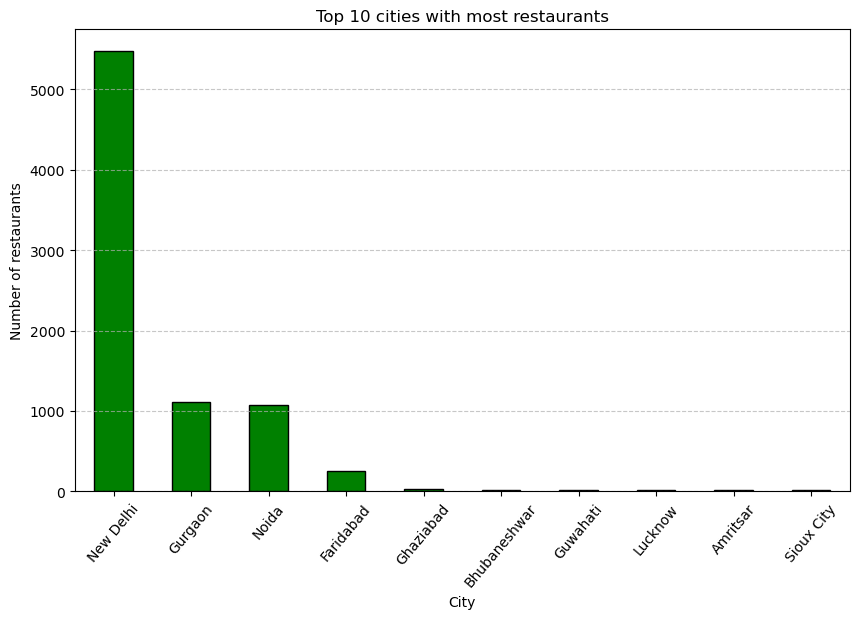

In [90]:
#visualize into bar chart

import matplotlib.pyplot as plt

#get top 10 cities
top_cities = data['City'].value_counts().head(10)

#plot the bar chart
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar', color='green', edgecolor='black')

plt.title('Top 10 cities with most restaurants')
plt.xlabel('City')
plt.ylabel('Number of restaurants')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Observation (EDA-Geographical Distribution)
- The dataset includes restaurants from 140 cities, with distribution heavily skewed toward a few major locations.

- <b>New Delhi </b> alone accounts for <b>5,473</b> restaurants, followed by <b>Gurgaon (1,118)</b> and <b>Noida (1,080)</b> — showing strong concentration in the Delhi-NCR region.

- Other cities like Faridabad, Ghaziabad, and Lucknow appear in the top 10, but with significantly lower counts.

- On the other hand, the bottom 10 cities (such as Middleton Beach, Montville, Potrero) each have only one restaurant, reflecting extremely limited presence in those regions.

- This distribution highlights a <b>geographic imbalance </b>, with the majority of restaurant data concentrated in a few Indian cities.

- A bar chart of the top 10 cities was plotted to visually support this observation and will be useful in dashboarding and reporting stages.

### Franchise Presence Across Cities 
- Identifying the <b>franchise with the most national presence (per country).</b>

##### 1. Merge the `data` and `Country-Code` tables

In [78]:

# Merge the datasets on 'Country Code'
merged_data = data.merge(country_code, how='left', on='Country Code') 


##### 2. Group by `Restaurant Name` and `Country` → Count unique cities

In [80]:
# Count number of unique cities each franchise appears in, within each country
franchise_national_presence = (
    merged_data.groupby(['Restaurant Name', 'Country'])['City']
    .nunique()
    .reset_index()
    .rename(columns={'City': 'Unique Cities'})
    .sort_values(by='Unique Cities', ascending=False)
)

# Display top 10 franchises with the widest national presence
print("Top 10 franchises with the widest national presence:")
print (franchise_national_presence.head(10))


Top 10 franchises with the widest national presence:
        Restaurant Name Country  Unique Cities
664     Barbeque Nation   India             21
4965          Pizza Hut   India             11
3318                KFC   India              8
6888  The Yellow Chilli   India              7
2100     Domino's Pizza   India              7
4928      Pind Balluchi   India              7
4218              Mocha   India              7
4081         McDonald's   India              7
3961     Mainland China   India              6
682      Baskin Robbins   India              5


##### Observation: 
- This task aimed to identify the <b>franchise with the most national presence</b>, defined as the restaurant brand with the <b>widest geographic spread within a single country</b>.

- To answer this meaningfully, the <code>data</code> and <code>country_code</code> tables were <b>merged</b>, and the analysis was performed using both <b>Restaurant Name</b> and <b>Country</b>, grouped by the number of <b>unique cities</b> each franchise operates in.

- The goal here is <b>not</b> to identify brands with the highest number of total outlets, but rather those with the <b>broadest city-level coverage within national borders</b> — a better indicator of <b>market penetration</b> and <b>strategic brand reach</b>.

- A brand that appears in <b>20 different cities</b> across a country is more likely to be seen by a wider user base and has greater <b>influence in recommendation systems</b>, compared to a brand with many outlets in just one or two cities.

- The results show that <b>Barbeque Nation</b> has the strongest national presence in India, appearing in <b>21 unique cities</b>. Other notable brands include <b>Pizza Hut</b>, <b>KFC</b>, <b>Domino’s</b>, and <b>McDonald’s</b>, each present in multiple Indian cities.

- However, it is important to note that since <b>India dominates the dataset</b> (e.g., <b>New Delhi alone has 5,473 entries</b>), this result is <b>real</b> but <b>heavily biased</b> by the dataset’s India-centric distribution.

- To ensure fair analysis and global insight, we should also identify the <b>top national franchise in each country</b> represented in the dataset — offering a more balanced view of brand presence per region.

##### 3. Find the top franchsise per country

In [82]:
# Find the top franchise per country with the most unique cities
top_franchise_per_country = (
   franchise_national_presence.sort_values(by='Unique Cities', ascending=False)
    .groupby('Country')
    .head(1)
    .reset_index(drop=True)
)

# Display the result
print ("Top Franchise per Country are: ")
print (top_franchise_per_country)


Top Franchise per Country are: 
        Restaurant Name         Country  Unique Cities
0       Barbeque Nation           India             21
1       Texas Roadhouse   United States              4
2            Applebee's             UAE              3
3            Chaophraya  United Kingdom              3
4      Talaga Sampireun       Indonesia              2
5      Silantro Fil-Mex     Phillipines              2
6      Al'frank Cookies       Singapore              1
7   1918 Bistro & Grill       Australia              1
8       23 On Hazelwood    South Africa              1
9       Big Fish Eatery     New Zealand              1
10                 Bibi          Brazil              1
11             Aalishan           Qatar              1
12      Arabian Knights       Sri Lanka              1
13        Arigato Sushi          Canada              1
14         AÅÙÅÙk Kahve          Turkey              1


##### Observation:
- The results show that <b>Barbeque Nation</b> leads in India with a presence in <b>21 cities</b>, while <b>Texas Roadhouse</b> (USA), <b>Applebee’s</b> (UAE), and <b>Chaophraya</b> (UK) are the most nationally spread brands in their respective countries.

- Several countries, especially those with limited data (e.g., Turkey, Canada, Sri Lanka), have brands present in <b>only one city</b>, which may reflect either limited franchise spread or limited data coverage.

- This global perspective enhances the analysis by identifying <b>regionally dominant brands</b> across different national markets, supporting more targeted and localized recommendations for the B2C platform.



### Ratio Between Restaurants That Allow Table Booking vs. Those That Don’t

In [84]:
# Percentage of restaurants with and without table booking
table_booking_ratio = data['Has Table booking'].value_counts(normalize=True) * 100
print("Percentage of restaurants with/without table booking:")
print(table_booking_ratio)


Percentage of restaurants with/without table booking:
Has Table booking
No     87.862907
Yes    12.137093
Name: proportion, dtype: float64


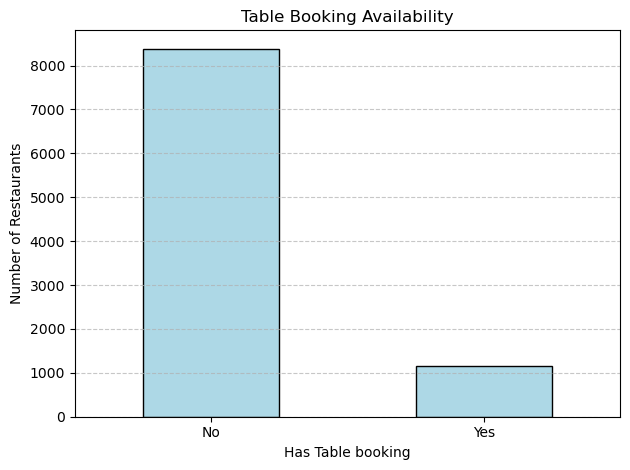

In [86]:
import matplotlib.pyplot as plt

# Bar chart for table booking availability
data['Has Table booking'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Table Booking Availability')
plt.xlabel('Has Table booking')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Observation:
- The `Has Table booking` column indicates whether a restaurant allows customers to reserve tables in advance.

- Out of <b>9,541 restaurants</b>, only <b>12.1% </b> offer table booking, while a significant <b> 87.9% </b>do not.

- This highlights that <b>most restaurants in the dataset follow a walk-in or quick-service model, with limited emphasis on advance reservations.
</b>
- A bar chart was plotted to visually demonstrate the large disparity between restaurants that offer and do not offer table booking, which can support insights in user-facing dashboards or filters.

### Percentage of Restaurants Providing Online Delivery

In [88]:
# Percentage of restaurants with and without online delivery
online_delivery_ratio = data['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of restaurants with/without online delivery:")
print(online_delivery_ratio)


Percentage of restaurants with/without online delivery:
Has Online delivery
No     74.310869
Yes    25.689131
Name: proportion, dtype: float64


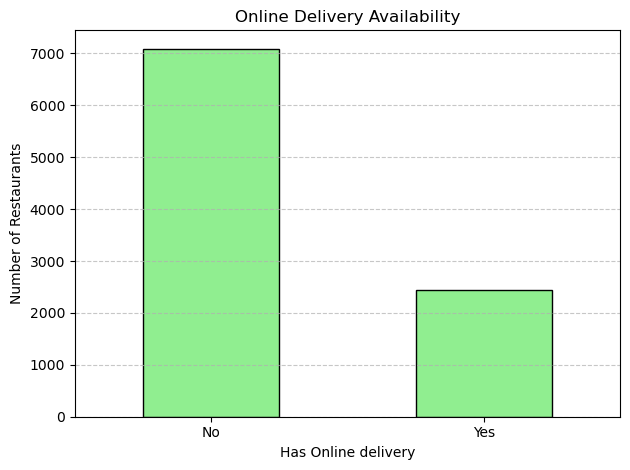

In [90]:
# Bar chart for online delivery availability
data['Has Online delivery'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Online Delivery Availability')
plt.xlabel('Has Online delivery')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Observation: 
- Only <b>25.7%</b> of restaurants offer online delivery, while the remaining <b>74.3%</b> do not.

- This indicates that a <b>majority of restaurants in the dataset operate without online ordering support</b>, suggesting potential areas for expansion in delivery partnerships.

- A bar chart was plotted to visually highlight the disparity between delivery-enabled and non-delivery restaurants.

### Difference in Number of Votes Between Restaurants That Deliver vs. Don’t Deliver
##### 1. Group and compare Average Votes

In [92]:
# Calculate the average number of votes for delivery vs. non-delivery restaurants
votes_by_delivery = data.groupby('Has Online delivery')['Votes'].mean().reset_index()

# Round values for cleaner display
votes_by_delivery['Votes'] = votes_by_delivery['Votes'].round(2)

# Display the result
votes_by_delivery


,Has Online delivery,Votes
0,No,137.83
1,Yes,211.31


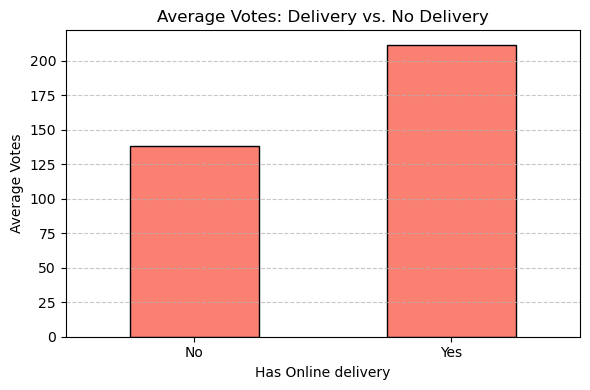

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
votes_by_delivery.set_index('Has Online delivery')['Votes'].plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Average Votes: Delivery vs. No Delivery')
plt.ylabel('Average Votes')
plt.xlabel('Has Online delivery')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Observation: 
- Restaurants that offer <b>online delivery</b> receive <b>significantly more votes</b> on average compared to those that do not.

- This suggests that delivery-enabled restaurants tend to have <b>higher customer engagement or visibility</b> on the platform.

- The difference in average votes was clearly shown through a comparison table and supported with a bar chart for better interpretation.

### Top 10 cuisines served across cities
- Identifying the most frequently served individual cuisines across all cities — not combinations like "North Indian, Chinese", but individual cuisine types (e.g., "Chinese" alone or as part of any combo).

- Since the `Cuisines` column often contains multiple values per row, like "North Indian, Chinese, Mughlai", we need to:

- Split these combinations

- Explode them into individual entries

- Count frequencies

In [96]:
# Drop missing values just in case (we already cleaned earlier, but just being safe)
cuisine_cleaned = data['Cuisines'].dropna()

# Split on comma and strip any extra whitespace
cuisine_split = cuisine_cleaned.str.split(', ')

# Explode into individual cuisine entries
cuisine_exploded = cuisine_split.explode()

# Count frequency of each cuisine
cuisine_counts = cuisine_exploded.value_counts()

# Display top 10
print("Top 10 cuisines served across cities:")
print(cuisine_counts.head(10))


Top 10 cuisines served across cities:
Cuisines
North Indian    3959
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          763
Bakery           745
Continental      735
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


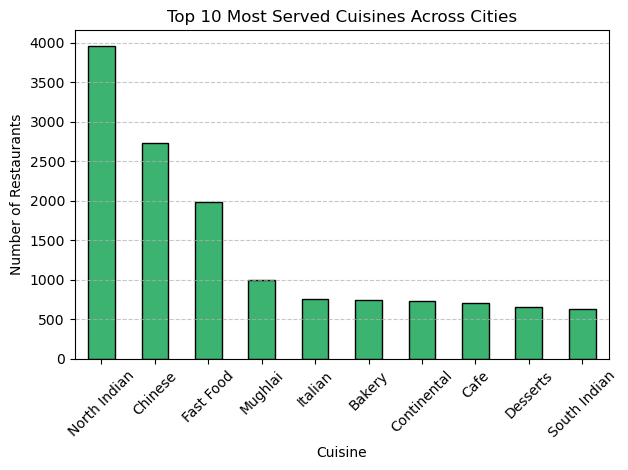

In [98]:
#Visualizing into  Bar chart to display top 10 cuisines
cuisine_counts.head(10).plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Top 10 Most Served Cuisines Across Cities')
plt.ylabel('Number of Restaurants')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Observation: 
- To analyze cuisine popularity, the multi-cuisine values in the Cuisines column were split and exploded into individual entries.

- The most commonly served cuisines across cities are <b>North Indian</b>, <b>Chinese</b>, <b>Fast Food</b>, and <b>South Indian</b>, with <b>North Indian</b> being the most dominant.

- These results reflect the general dining preferences across the dataset and can support the platform in curating cuisine-based recommendations.

- A bar chart was used to visually represent the top 10 cuisines based on frequency of occurrence.

### Max/Min Number of Cuisines per Restaurant & Most Served Cuisine Per City
##### Part 1: Max & Min Number of Cuisines Per Restaurant

In [100]:
# Drop nulls (should already be clean but, just being safe)
cuisine_counts_per_restaurant = data['Cuisines'].dropna().str.split(', ').apply(len)

# Get min and max number of cuisines served
min_cuisines = cuisine_counts_per_restaurant.min()
max_cuisines = cuisine_counts_per_restaurant.max()

print(f"Minimum number of cuisines served by a restaurant: {min_cuisines}")
print(f"Maximum number of cuisines served by a restaurant: {max_cuisines}")


Minimum number of cuisines served by a restaurant: 1
Maximum number of cuisines served by a restaurant: 8


##### Observation:
- Most restaurants offer a <b>small number of cuisines</b>, while a few provide a <b>diverse menu with up to 8 cuisine types</b>.

- This variation highlights differences in restaurant offerings — from focused, niche kitchens to broad multi-cuisine establishments — which could be relevant in understanding customer preferences, ratings, or operational complexity in <b>further analysis </b>:

    - Analyze whether restaurants offering <b>more cuisines receive higher or lower average ratings</b>. This can reveal if customers prefer variety or perceive it as lower quality.

    - Explore if <b>multi-cuisine restaurants tend to receive more votes</b>, indicating greater customer engagement or popularity.
 
    - Investigate whether <b>delivery-enabled restaurants</b> offer more or fewer cuisines — to understand complexity in delivery logistics.
 
    - Compare <b>price range vs. number of cuisines</b> to see if multi-cuisine restaurants are positioned as more premium.

#####  Part 2: Most Common Cuisine Per City

In [102]:
# Merge exploded cuisines with city info
cuisine_city_df = data[['City', 'Cuisines']].dropna()
cuisine_city_df = cuisine_city_df.assign(Cuisines=cuisine_city_df['Cuisines'].str.split(', ')).explode('Cuisines')

# Group by city and cuisine, count frequency
top_cuisine_per_city = (
    cuisine_city_df.groupby(['City', 'Cuisines'])
    .size()
    .reset_index(name='Count')
    .sort_values(['City', 'Count'], ascending=[True, False])
    .drop_duplicates(subset='City', keep='first')
    .reset_index(drop=True)
)

# Display a few examples
top_cuisine_per_city.head(10)


,City,Cuisines,Count
0,Abu Dhabi,Indian,7
1,Agra,North Indian,15
2,Ahmedabad,Continental,11
3,Albany,American,4
4,Allahabad,North Indian,12
5,Amritsar,North Indian,15
6,Ankara,Kebab,10
7,Armidale,Bar Food,1
8,Athens,American,5
9,Auckland,Cafe,5


##### Observation:
- For each city, the most frequently served cuisine was identified to understand local food preferences.

- Results show regional trends — e.g., <b>North Indian</b> is dominant in cities like <b>Agra, Amritsar, and Allahabad</b>, while <b>American</b> cuisine leads in <b>Albany and Athens</b>.

- This insight can help the platform tailor city-specific recommendations, promotions, or featured listings based on cuisine popularity.

###  Distribution of Cost Across Restaurants
- Understand how the `Average Cost for two` is distributed among restaurants — whether it's skewed, uniform, or has outliers — <b>to assess affordability trends and pricing patterns.</b>

In [104]:
# basic Summary statistis

print(data['Average Cost for two'].describe())


count      9541.000000
mean       1200.368096
std       16129.588655
min           0.000000
25%         250.000000
50%         400.000000
75%         700.000000
max      800000.000000
Name: Average Cost for two, dtype: float64


##### Observation: 
- This metric was already explored during the initial inspection of numerical columns.
- The `Average Cost for two` ranges from <b>₹0 to ₹800,000</b>, with a <b>mean of ₹1,200</b> and a <b>median of ₹400</b>, indicating a <b>right-skewed distribution</b>.
- While 75% of restaurants fall under ₹700, the extreme upper values cause a sharp increase in the average and standard deviation (₹16,129), clearly suggesting the presence of <b>strong outliers</b>.
- These outliers could represent <b>luxury fine-dining restaurants</b> or possible <b>data entry errors</b> (e.g., added zeros), and although they distort statistical summaries, they may still carry insight value.
- Based on the nature of this project, these values are <b>flagged but not removed</b>. At this stage of EDA, the goal is to observe — not clean — and such extremes may highlight niche market segments or exceptional cases worth attention.
- For more accurate interpretation, the platform may consider using <b>median-based insights</b> or visualizing cost distribution on a <b>logarithmic scale</b> in dashboards or reports.

##### Regular Histogram

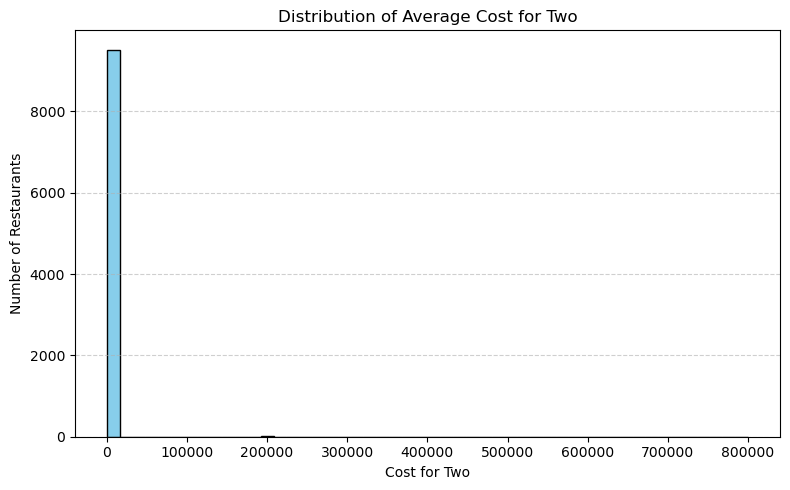

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(data['Average Cost for two'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Observation:
- The regular histogram shows that the <b>majority of restaurants cluster around the lower cost range</b>.

- However, the distribution appears right-skewed, and higher-cost restaurants are not clearly visible due to compression at the upper end.

##### Histogram with Log Scale on Y-Axis

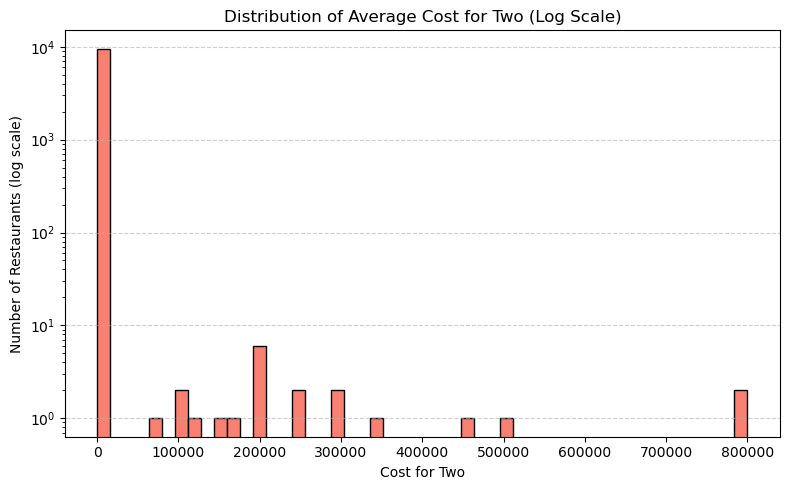

In [108]:
plt.figure(figsize=(8,5))
plt.hist(data['Average Cost for two'], bins=50, color='salmon', edgecolor='black')
plt.yscale('log')  # Compresses the y-axis to make long tails more visible
plt.title('Distribution of Average Cost for Two (Log Scale)')
plt.xlabel('Cost for Two')
plt.ylabel('Number of Restaurants (log scale)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Observation:
- The log-scale histogram reveals the presence of <b>extreme outliers</b>, with a long tail extending up to <b>800,000</b>.

- This view helps highlight the skewness and cost variability that are hidden in the regular histogram, supporting a more accurate understanding of the overall pricing landscape.


### Rating Distribution & Influencing Factors
- Understand how ratings are distributed and what factors might influence them — such as: <b> `Cost`,`Number of cuisines`, `Online delivery`, `Table booking`,`Votes`, etc.</b>
- This is where we start looking at relationships between ratings and other variables — not just single-column stats.

#### Part 1: Understand Rating Distribution
##### Step 1.1: Check Unique Values & Frequency

In [110]:
# Frequency of each unique rating
rating_counts = data['Aggregate rating'].value_counts().sort_index()
print("Rating distribution:\n", rating_counts)


Rating distribution:
 Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     495
3.5     480
3.6     458
3.7     427
3.8     399
3.9     332
4.0     266
4.1     273
4.2     221
4.3     174
4.4     143
4.5      95
4.6      78
4.7      41
4.8      25
4.9      61
Name: count, dtype: int64


#####  Step 1.2: Visualize Rating Distribution

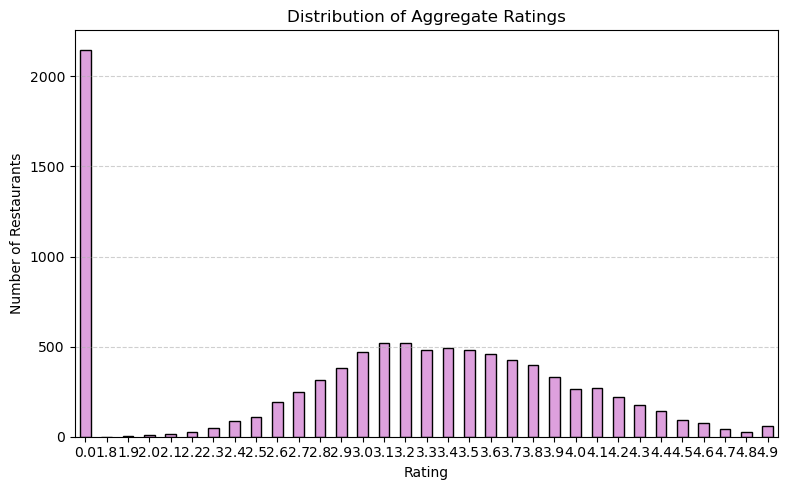

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
rating_counts.plot(kind='bar', color='plum', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Observation:
- Ratings are discrete values (e.g., 2.5, 3.1, 3.8...)

- <b>Most restaurants fall in the 3.0 to 4.0 range </b>

- A large number of restaurants are at 0.0 rating, meaning “Not rated”

- Very few restaurants reach above 4.5, suggesting that near-perfect ratings are rare and likely reserved for highly exceptional establishments.

#### Part 2: Explore Factors That May Influence Ratings
##### 2.1: Rating vs. Votes (scatterplot)

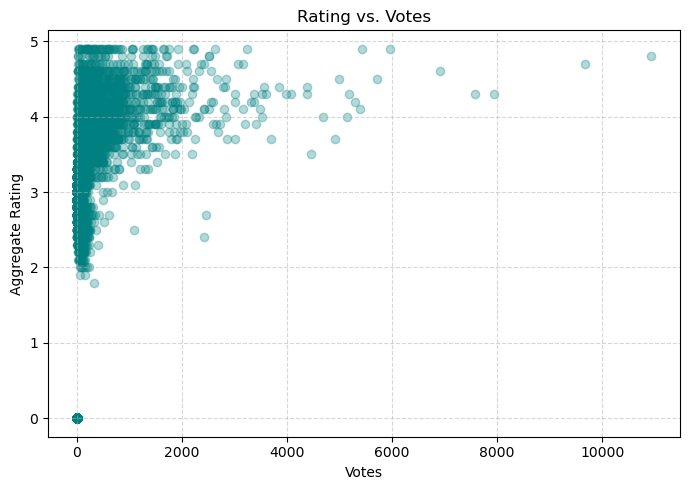

In [114]:
plt.figure(figsize=(7,5))
plt.scatter(data['Votes'], data['Aggregate rating'], alpha=0.3, color='teal')
plt.title('Rating vs. Votes')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### Observation: 
- There is a <b>positive relationship</b> between the number of votes and aggregate rating — restaurants with <b>higher engagement</b> tend to maintain better ratings.

- However, most restaurants have <b>low vote counts</b>, suggesting limited user feedback for a majority of entries.

- A few high-vote, high-rating outliers are visible, likely representing <b>top-performing or franchise restaurants</b> with strong customer bases.

#####  2.2: Rating vs. Cost (scatterplot)

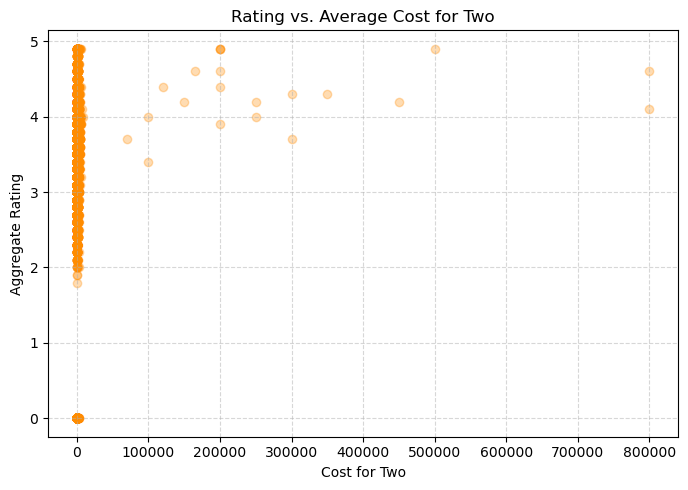

In [116]:
plt.figure(figsize=(7,5))
plt.scatter(data['Average Cost for two'], data['Aggregate rating'], alpha=0.3, color='darkorange')
plt.title('Rating vs. Average Cost for Two')
plt.xlabel('Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### Observation:
- The relationship between rating and average cost is <b>weak and scattered</b>, indicating that <b>pricing is not a strong predictor of customer satisfaction</b>.

- Well-rated restaurants exist at both low and high price points, suggesting that factors like <b>service quality, food variety, or delivery options</b> may play a larger role in influencing ratings.

- The result supports a platform strategy that considers <b>multiple variables</b> beyond price alone for recommendations.

##### 2.3 Rating vs. Online Delivery

In [118]:
# Average rating grouped by delivery option
rating_by_delivery = data.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
rating_by_delivery['Aggregate rating'] = rating_by_delivery['Aggregate rating'].round(2)
print(rating_by_delivery)


  Has Online delivery  Aggregate rating
0                  No              2.46
1                 Yes              3.25


##### Observation:
- Restaurants that offer <b>online delivery</b> tend to have <b>slightly higher average ratings</b> than those that do not.

- This suggests that the <b>convenience of delivery</b> may contribute positively to customer satisfaction and perceived value.

##### 2.4 Rating vs. Table Booking

In [120]:
# Average rating grouped by table booking option
rating_by_table = data.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()
rating_by_table['Aggregate rating'] = rating_by_table['Aggregate rating'].round(2)
print(rating_by_table)


  Has Table booking  Aggregate rating
0                No              2.56
1               Yes              3.44


##### Observation:
- Restaurants with <b>table booking options</b> show a <b>notably higher average rating</b> compared to those without.

- This may reflect better service quality or more premium dining experiences, which often correlate with higher ratings.

##### 2.5 Rating vs. Number of Cuisines

In [122]:
# Number of cuisines per restaurant
cuisine_count = data['Cuisines'].dropna().str.split(', ').apply(len)

# Combine cuisine count with ratings
rating_vs_cuisine_count = data.copy()
rating_vs_cuisine_count['Cuisine Count'] = cuisine_count

# Group and get average rating per cuisine count
rating_by_cuisine_count = (
    rating_vs_cuisine_count.groupby('Cuisine Count')['Aggregate rating']
    .mean()
    .reset_index()
    .round(2)
)
print(rating_by_cuisine_count)



   Cuisine Count  Aggregate rating
0              1              2.23
1              2              2.69
2              3              3.04
3              4              3.41
4              5              3.51
5              6              3.67
6              7              3.67
7              8              3.42


##### Observation:
- The average rating tends to <b>increase slightly with the number of cuisines offered</b>, peaking around a moderate count, and then plateaus or slightly dips.

-  This indicates that offering <b>2–4 well-curated cuisines</b> may strike a balance between variety and quality, beyond which the complexity may not add value to customers.

### Rating Distribution & Influencing Factors
- Ratings in the dataset follow a <b>discrete and right-skewed pattern</b>, with most restaurants rated between <b>3.0 and 4.0</b>, and a notable portion marked as <b>0.0 (unrated)</b>.

- Visual analysis shows that <b>higher votes</b tend to correspond with <b>higher ratings</b>, suggesting strong user engagement leads to better perceived quality.

- Restaurants that offer <b>table booking</b> or <b>online delivery</b> tend to have slightly higher average ratings, possibly due to enhanced convenience or service.

- The <b>number of cuisines</b> offered shows a mild positive relationship with ratings — with restaurants offering <b>2 to 4 cuisines</b> appearing to perform best.

- On the other hand, <b>average cost</b> does not show a clear correlation with ratings, suggesting that customers value factors beyond pricing.



In [130]:
#re-checking dataset before exporting the cleaned, transformed dataset into a CSV file for Tableau Viz
# Show first 5 rows
print("First 5 rows:")
print(merged_data.head())

# Show 5 randomly selected unique rows
print("\nSample of 5 unique rows:")
print(merged_data.drop_duplicates().sample(5))



First 5 rows:
   Restaurant ID              Restaurant Name  Country Code     City  \
0        7402935                         Skye            94  Jakarta   
1        7410290     Satoo - Hotel Shangri-La            94  Jakarta   
2        7420899                   Sushi Masa            94  Jakarta   
3        7421967               3 Wise Monkeys            94  Jakarta   
4        7422489  Avec Moi Restaurant and Bar            94  Jakarta   

                                             Address  \
0  Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...   
1               Hotel Shangri-La, Jl. Jend. Sudirman   
2                   Jl. Tuna Raya No. 5, Penjaringan   
3                Jl. Suryo No. 26, Senopati, Jakarta   
4  Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta   

                        Locality                        Locality Verbose  \
0  Grand Indonesia Mall, Thamrin  Grand Indonesia Mall, Thamrin, Jakarta   
1     Hotel Shangri-La, Sudirman     Hotel Shangri-La, Sudirman,

In [1]:
# Print column names
print("🧩 Column Names:")
print(merged_data.columns.tolist())

# Print shape (rows, columns)
print("\n🔢 Shape of the DataFrame:")
print(merged_data.shape)

# Check for missing values
print("\n❓ Missing Values per Column:")
print(merged_data.isnull().sum())

# Check for duplicate rows
print("\n📛 Number of Duplicate Rows:")
print(merged_data.duplicated().sum())


🧩 Column Names:


NameError: name 'merged_data' is not defined

In [128]:
merged_data.to_csv("cleaned_restaurant_data.csv", index=False)
#exported the cleanded dataset


###  Issue: Currency Inconsistency in "Average Cost for Two"

During the project, it was noticed that the "Average Cost for Two" values were recorded in local currencies, which made cross-country comparisons misleading (e.g., 800,000 in Indonesia is approximately $50 USD). Two potential solutions were considered: (1) converting all values to USD in Python, or (2) displaying the cost along with the respective currency symbols. Solution (1) was chosen to ensure better clarity and consistency across the dashboard.


In [3]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_restaurant_data.csv")

# Preview the data
df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia


In [14]:
#Create a Currency Conversion Mapping 

# Example conversion rates (static for now)
currency_conversion = {
    'India': 0.012,
    'Indonesia': 0.000063,
    'Australia': 0.66,
    'Brazil': 0.20,
    'Canada': 0.74,
    'Qatar': 0.27,
    'Singapore': 0.74,
    'Sri Lanka': 0.0031,
    'UAE': 0.27,
    'United Kingdom': 1.25,
    'United States': 1.00,
    'New Zealand': 0.60,
    'South Africa': 0.052,
    'Phillipines': 0.018,
    'Turkey': 0.031
}
# Define a function to convert cost to USD
def convert_to_usd(row):
    rate = currency_conversion.get(row['Country'], None)
    if rate is not None:
        return row['Average Cost for two'] * rate
    else:
        return None  # or row['Average Cost for two'] if you want to keep it unchanged

# Apply the conversion
df['Avg Cost for Two (USD)'] = df.apply(convert_to_usd, axis=1)


In [16]:
# Check a few rows with the new USD column
df[['Country', 'Average Cost for two', 'Avg Cost for Two (USD)']].head(10)


,Country,Average Cost for two,Avg Cost for Two (USD)
0,Indonesia,800000,50.40
1,Indonesia,800000,50.40
2,Indonesia,500000,31.50
3,Indonesia,450000,28.35
4,Indonesia,350000,22.05
5,Indonesia,300000,18.90
6,Indonesia,300000,18.90
7,Indonesia,250000,15.75
8,Indonesia,250000,15.75
9,Indonesia,200000,12.60


In [18]:
# Export the updated dataset with the USD column
df.to_csv("transformed_restaurant_data.csv", index=False)


In [20]:
# Countries in dataset but not in the conversion dictionary
missing_countries = df[ df['Avg Cost for Two (USD)'].isnull() ]['Country'].unique()
print("Countries missing conversion rate:", missing_countries)


Countries missing conversion rate: []


In [22]:

# Check how many Singapore restaurants have Online Delivery = Yes
singapore_delivery = df[(df['Country'] == 'Singapore') & (df['Has Online delivery'] == 'Yes')]
total_singapore = df[df['Country'] == 'Singapore']

print("Total Singapore Restaurants:", len(total_singapore))
print("With Online Delivery:", len(singapore_delivery))


Total Singapore Restaurants: 20
With Online Delivery: 0


In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv("transformed_restaurant_data.csv")

# Drop missing values in the 'Cuisines' column
#df = df.dropna(subset=['Cuisines'])

# Count the number of cuisines in each row (split by ", ")
df['Cuisine Count'] = df['Cuisines'].apply(lambda x: len(x.split(', ')))

# Check the max
print("Maximum number of cuisines per row:", df['Cuisine Count'].max())

# Optional: check average or explore further
# print("Average number of cuisines per row:", df['Cuisine Count'].mean())

Maximum number of cuisines per row: 8


### Splitting and Exploding the "Cuisines" Column

While preparing visual insights for the dashboard in Tableau, we discovered that the **"Cuisines"** column contains **multiple cuisines combined into a single cell**, separated by commas (e.g., "Italian, Continental, Cafe"). This structure prevents accurate analysis of individual cuisine popularity, since Tableau treats the full string as a single value.

Although Tableau offers a **"Split"** function, it only handles up to 4 or 5 components, and our analysis showed that some restaurants in the dataset list up to **8 cuisines** per row. Therefore, we cannot rely on Tableau alone to properly split and count individual cuisines.

To resolve this and ensure data integrity, we are using Python to:
1. **Split** each combined cuisine string into individual cuisines
2. **Explode** the dataset so each row represents one cuisine per restaurant

This transformation enables us to analyze and visualize cuisine popularity correctly in Tableau using a clean, structured dataset.


In [7]:
# Step: Splitting and Exploding the Cuisines Column

# Drop rows with missing cuisines (just in case)
df_cleaned = df.dropna(subset=['Cuisines']).copy()

# Split the 'Cuisines' column by comma and explode into separate rows
df_cleaned['Cuisines'] = df_cleaned['Cuisines'].str.split(', ')
df_exploded = df_cleaned.explode('Cuisines')

# Remove any leading/trailing whitespace (extra clean)
df_exploded['Cuisines'] = df_exploded['Cuisines'].str.strip()

# Preview the result
df_exploded[['Restaurant Name', 'Cuisines']].head(10)


,Restaurant Name,Cuisines
0,Skye,Italian
0,Skye,Continental
1,Satoo - Hotel Shangri-La,Asian
1,Satoo - Hotel Shangri-La,Indonesian
1,Satoo - Hotel Shangri-La,Western
2,Sushi Masa,Sushi
2,Sushi Masa,Japanese
3,3 Wise Monkeys,Japanese
4,Avec Moi Restaurant and Bar,French
4,Avec Moi Restaurant and Bar,Western


This will:

- Make sure each cuisine gets its own row

- Preserve other restaurant-level data

- Help Tableau recognize and count cuisines correctly

In [13]:
# Export the exploded cuisine dataset for Tableau
df_exploded.to_csv("exploded_cuisine_data.csv", index=False)
